# 1-fi-特征重要性

0.8450752976507327
0.9146372519405249
[0.04162599 0.00202054 0.00718919 0.00059505 0.04341926 0.2819869
 0.0196626  0.09920403 0.01511787 0.03986936 0.03849006 0.01738971
 0.39342944]
[0.04162599 0.00202054 0.00718919 0.00059505 0.04341926 0.2819869
 0.0196626  0.09920403 0.01511787 0.03986936 0.03849006 0.01738971
 0.39342944]


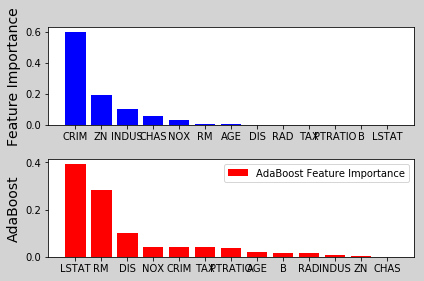

In [11]:
import matplotlib.pyplot as mp
import sklearn.datasets as sd
import sklearn.utils as su
import  sklearn.tree as st
import  sklearn.metrics as sm
import  sklearn.ensemble as se
import numpy as np
import sklearn.datasets as sd

boston=sd.load_boston()
headers=boston.feature_names

#读取数据
boston=sd.load_boston()
# print(boston.feature_names)
# print(boston.data[0],boston.data.shape)
# print(boston.target[0],boston.target.shape)

#打乱数据集后，拆分训练集与测试集
x,y=su.shuffle(boston.data,boston.target,random_state=7)
# print(x,y)
train_size=int(len(x)*0.8)
# print(train_size)
train_x,test_x,train_y,test_y=x[:train_size],x[train_size:],y[:train_size],y[train_size:]
# print(train_x,test_x,train_y,test_y)

#构建决策树回归器模型，训练模型
model=st.DecisionTreeRegressor(max_depth=5)
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))
fi=model.feature_importances_
#绘制特征重要性柱状图(决策树)
mp.figure('Feature Importance',facecolor='lightgray')
mp.subplot(211)
mp.ylabel('Feature Importance',fontsize=14)
x=np.arange(fi.size)
#用于排序索引掩码
sorted_inds=fi.argsort()[::-1]

mp.bar(x,fi[sorted_inds],color='blue',label='Decision Tree Feature Importance')

#修改刻度
mp.xticks(x,headers)


#构建正向激励回归器
model=se.AdaBoostRegressor(model,n_estimators=400,random_state=7)
model.fit(train_x,train_y)
pred_test_y=model.predict(test_x)
print(sm.r2_score(test_y,pred_test_y))
fi=model.feature_importances_
print(fi)

#特征重要性
fi=model.feature_importances_
print(fi)

mp.subplot(212)
mp.ylabel('AdaBoost',fontsize=14)
x=np.arange(fi.size)
#用于排序索引掩码
sorted_inds=fi.argsort()[::-1]
mp.bar(x,fi[sorted_inds],color='red',label='AdaBoost Feature Importance')
#修改刻度
mp.xticks(x,headers[sorted_inds])

mp.tight_layout()
mp.legend()
mp.show()

# 2-bike-共享单车

In [12]:

import numpy as np
import  sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp


data=[]
header=None
with open('./data/ml_data/bike_day.csv','r')as f:
    for i ,line in enumerate(f.readlines()):
        if i==0:
            header=line[::-1].split(',')
        else:
            data.append(line.split(','))

#整理数据集
header=header[2:13]
# print(header)
data=np.array(data)
x=data[:,2:13].astype('f8')
y=data[:,-1].astype('f8').ravel()            #将二维数组拉成一维数组


#打乱数据集，拆分训练集与测试集
x,y=su.shuffle(x,y,random_state=7)
train_size=int(len(x)*0.9)
train_x,test_x,train_y,test_y=x[:train_size],x[train_size:],y[:train_size],y[train_size:]
#训练随机森林回归模型，预测结果
model=se.RandomForestRegressor(max_depth=10,n_estimators=1000,min_samples_split=2)
model.fit(train_x,train_y)
predict_test_y=model.predict(test_x)
#评估模型
print(sm.r2_score(test_y,predict_test_y))

0.8917397178311851


# 2-bike-共享单车2

In [13]:
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

data = np.loadtxt('./data/ml_data/bike_hour.csv', unpack=False, dtype='U20', delimiter=',')
day_headers = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)

x, y = su.shuffle(x, y, random_state=7)
print(x.shape, y.shape)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], y[:train_size], y[train_size:]
# 随机森林回归器
model = se.RandomForestRegressor( max_depth=10, n_estimators=1000, min_samples_split=2)
model.fit(train_x, train_y)
# 基于“天”数据集的特征重要性
fi_dy = model.feature_importances_
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

data = np.loadtxt('./data/ml_data/bike_hour.csv', unpack=False, dtype='U20', delimiter=',')
hour_headers = data[0, 2:13]
x = np.array(data[1:, 2:13], dtype=float)
y = np.array(data[1:, -1], dtype=float)
x, y = su.shuffle(x, y, random_state=7)
train_size = int(len(x) * 0.9)
train_x, test_x, train_y, test_y = \
    x[:train_size], x[train_size:], \
    y[:train_size], y[train_size:]
# 随机森林回归器
model = se.RandomForestRegressor(
    max_depth=10, n_estimators=1000,
    min_samples_split=2)
model.fit(train_x, train_y)
# 基于“小时”数据集的特征重要性
fi_hr = model.feature_importances_
pred_test_y = model.predict(test_x)
print(sm.r2_score(test_y, pred_test_y))

(17379, 11) (17379,)
0.918668953202865
0.9187216305077248


# 3-cl-人工分类

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


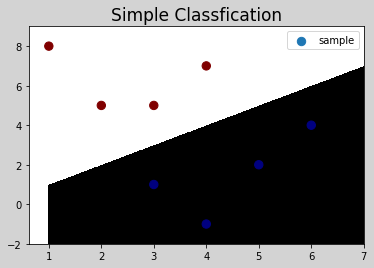

In [14]:

import numpy as np
import matplotlib.pyplot as mp

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

#绘制分类边界线（把整个的图标区间表格化，预测每个小格子的类别标签）
#使用pcolormesh为这些小格子添加标签
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1

n=1000
grid_x,grid_y=np.meshgrid(
    np.linspace(1,r,n),
    np.linspace(b,t,n)
    )
#数组处理函数
grid_z=np.piecewise(grid_x,[grid_x>grid_y,grid_x<=grid_y],[0,1])
print(grid_z)

#画图
mp.figure('Simple Classfication',facecolor='lightgray')
mp.title('Simple Classfication',fontsize=17)
mp.grid(linestyle=':')
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0],x[:,1],s=70,marker='o',c=y,cmap='jet',label='sample')
mp.legend()
mp.show()

# 5-lr-逻辑分类

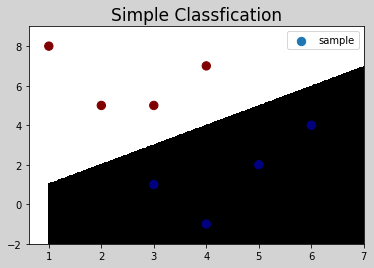

In [15]:
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
    [3, 1],
    [2, 5],
    [1, 8],
    [6, 4],
    [5, 2],
    [3, 5],
    [4, 7],
    [4, -1]])
y = np.array([0, 1, 1, 0, 0, 1, 1, 0])

#基于逻辑分类器，训练分类模型
model=lm.LogisticRegression(solver='liblinear',C=1)
model.fit(x,y)

#绘制分类边界线（把整个的图标区间表格化，预测每个小格子的类别标签）
#使用pcolormesh为这些小格子添加标签
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1

n=500
grid_x,grid_y=np.meshgrid(
    np.linspace(1,r,n),
    np.linspace(b,t,n)
    )
#基于model对象，对每个坐标点进行类别预测，从而得到类别标签，使用该类别值填充背景颜色
samples=np.column_stack((grid_x.ravel(),
                         grid_y.ravel()
                         ))
grid_z =model.predict(samples)
grid_z=grid_z.reshape(grid_x.shape)
#画图
mp.figure('Simple Classfication',facecolor='lightgray')
mp.title('Simple Classfication',fontsize=17)
mp.grid(linestyle=':')
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0],x[:,1],s=70,marker='o',c=y,cmap='jet',label='sample')
mp.legend()
mp.show()

# 6-mmr-基于逻辑实现多元分类

/home/tarena/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


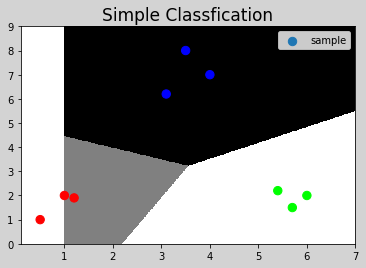

In [16]:

import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as lm

x = np.array([
    [4, 7],
    [3.5, 8],
    [3.1, 6.2],
    [0.5, 1],
    [1, 2],
    [1.2, 1.9],
    [6, 2],
    [5.7, 1.5],
    [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])

#基于逻辑分类器，训练分类模型
model=lm.LogisticRegression(solver='liblinear',C=1000)
model.fit(x,y)

#绘制分类边界线（把整个的图标区间表格化，预测每个小格子的类别标签）
#使用pcolormesh为这些小格子添加标签
l,r=x[:,0].min()-1,x[:,0].max()+1
b,t=x[:,1].min()-1,x[:,1].max()+1

n=500
grid_x,grid_y=np.meshgrid(
    np.linspace(1,r,n),
    np.linspace(b,t,n)
    )
#基于model对象，对每个坐标点进行类别预测，从而得到类别标签，使用该类别值填充背景颜色
samples=np.column_stack((grid_x.ravel(),
                         grid_y.ravel()
                         ))
grid_z =model.predict(samples)
grid_z=grid_z.reshape(grid_x.shape)
#画图
mp.figure('Simple Classfication',facecolor='lightgray')
mp.title('Simple Classfication',fontsize=17)
mp.grid(linestyle=':')
mp.pcolormesh(grid_x,grid_y,grid_z,cmap='gray')
mp.scatter(x[:,0],x[:,1],s=70,marker='o',c=y,cmap='brg',label='sample')
mp.legend()
mp.show()

# 7-bayes-朴素贝叶斯分类

(400, 3)
(400, 2)
(400,)


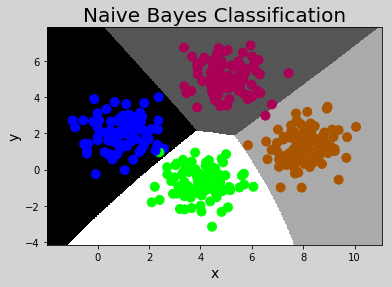

In [17]:

import numpy as np
import sklearn.naive_bayes as nb
import matplotlib.pyplot as mp
                                                    #不拆包
data = np.loadtxt('./data/ml_data/multiple1.txt', unpack=False, dtype='U20', delimiter=',')
print(data.shape)
#所有行的前两列
x = np.array(data[:, :-1], dtype=float)
print(x.shape)
#所有行的最后一列
y = np.array(data[:, -1], dtype=float)
print(y.shape)
# 创建高斯分布朴素贝叶斯分类器
model = nb.GaussianNB()
#训练
model.fit(x, y)

#拆分
l, r = x[:, 0].min() - 1, x[:, 0].max() + 1
b, t = x[:, 1].min() - 1, x[:, 1].max() + 1
#把总体切成500份
n = 500

#绘制分类边界线
grid_x, grid_y = np.meshgrid(np.linspace(l, r, n), np.linspace(b, t, n))
samples = np.column_stack((grid_x.ravel(), grid_y.ravel()))
grid_z = model.predict(samples)
#变维(改变成二位矩阵)
grid_z = grid_z.reshape(grid_x.shape)

mp.figure('Naive Bayes Classification', facecolor='lightgray')
mp.title('Naive Bayes Classification', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.pcolormesh(grid_x, grid_y, grid_z, cmap='gray')
mp.scatter(x[:, 0], x[:, 1], c=y, cmap='brg', s=80)
mp.show()